In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import pickle

In [25]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [26]:
print("Shape of Training data: ", df_train.shape)
print("Shape of Testing data: ", df_test.shape)

Shape of Training data:  (20800, 5)
Shape of Testing data:  (5200, 4)


In [27]:
class_labels  = df_train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


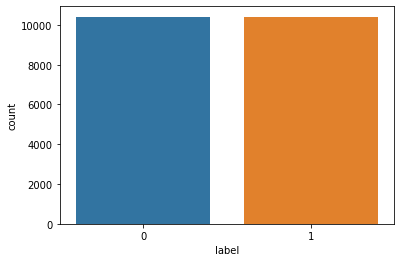

In [28]:
import seaborn as sns
ax = sns.countplot(x="label",data=df_train)

In [29]:
df_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [30]:
df_train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [31]:
df = df_train.drop(["id", "title", "author"], axis = 1)

In [32]:
print("Null values in train data:")
print(df_train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(df_test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64



Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


In [33]:
df_d= df.dropna()

In [34]:
df_d.isnull().sum()

text     0
label    0
dtype: int64

In [35]:
df=df_d

In [36]:
df = df.sample(frac = 1)

In [37]:
df.head(10)

,text,label
6640,Part 9 Religious Fraud https://www.youtube.com...,1
10926,"Share on Facebook Washington, D.C. – Billionai...",1
9791,Other Writers \nSwedish Democrat party member ...,1
3592,"November 8, 2016 Trump Supporter Pulls Gun On ...",1
325,JERUSALEM — The Israeli government on Sunda...,0
20009,Gardasil Vaccine Given without Consent and Rui...,1
6721,The owner of the Dallas Cowboys Jerry Jones wi...,0
13257,Economist and American civil servant Dr. Paul ...,1
20233,The storm that devastated parts of the South o...,0
3344,Armenian genocide concert in Istanbul cancelle...,1


In [38]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [39]:
df.columns

Index(['text', 'label'], dtype='object')

In [40]:
df.head()

,text,label
0,Part 9 Religious Fraud https://www.youtube.com...,1
1,"Share on Facebook Washington, D.C. – Billionai...",1
2,Other Writers \nSwedish Democrat party member ...,1
3,"November 8, 2016 Trump Supporter Pulls Gun On ...",1
4,JERUSALEM — The Israeli government on Sunda...,0


In [41]:
x = df["text"]
y = df["label"]
x.shape, y.shape

((20761,), (20761,))

In [42]:
x

0        Part 9 Religious Fraud https://www.youtube.com...
1        Share on Facebook Washington, D.C. – Billionai...
2        Other Writers \nSwedish Democrat party member ...
3        November 8, 2016 Trump Supporter Pulls Gun On ...
4        JERUSALEM  —   The Israeli government on Sunda...
                               ...                        
20756    Russian oil giant Rosneft to restore Romanov p...
20757    Good morning. Here’s what you need to know: • ...
20758    We Are Change \nIn this video Luke Rudkowski i...
20759    Oregon Standoff Leaders Acquitted For Malheur ...
20760    PHILADELPHIA  —   Transit workers here went on...
Name: text, Length: 20761, dtype: object

In [43]:
y

0        1
1        1
2        1
3        1
4        0
        ..
20756    1
20757    0
20758    1
20759    1
20760    0
Name: label, Length: 20761, dtype: int64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=100)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
pickle.dump(xv_train, open('vectorizer.sav', 'wb'))

In [25]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
filename = 'logisticRegression.sav'
pickle.dump(LR, open(filename, 'wb'))

pred_lr=LR.predict(xv_test)

In [29]:
LR.score(xv_test, y_test)

0.9400361228175798

In [30]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4186
           1       0.93      0.94      0.94      4119

    accuracy                           0.94      8305
   macro avg       0.94      0.94      0.94      8305
weighted avg       0.94      0.94      0.94      8305



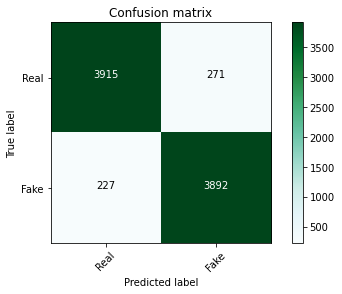

In [31]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## MultinomialNB

In [32]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)
filename = 'multinomialNB.sav'
pickle.dump(NB, open(filename, 'wb'))

pred = NB.predict(xv_test)
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(xv_test, y_test)))

Accuracy of NB classifier on test set: 0.84


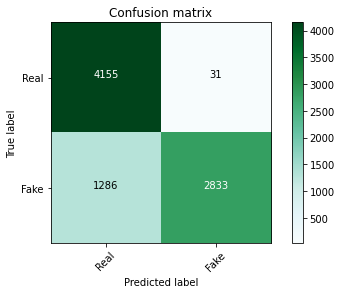

In [33]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4186
           1       0.99      0.69      0.81      4119

    accuracy                           0.84      8305
   macro avg       0.88      0.84      0.84      8305
weighted avg       0.88      0.84      0.84      8305



## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
filename = 'DecisionTree.sav'
pickle.dump(DT, open(filename, 'wb'))


In [37]:
pred_dt = DT.predict(xv_test)

In [38]:
DT.score(xv_test, y_test)

0.8776640577965081

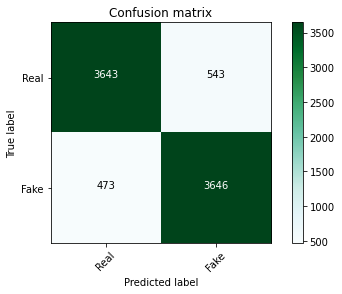

In [39]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [40]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4186
           1       0.87      0.89      0.88      4119

    accuracy                           0.88      8305
   macro avg       0.88      0.88      0.88      8305
weighted avg       0.88      0.88      0.88      8305



## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xv_train, y_train)
filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.6492474413004214
              precision    recall  f1-score   support

           0       0.95      0.32      0.48      4186
           1       0.59      0.98      0.74      4119

    accuracy                           0.65      8305
   macro avg       0.77      0.65      0.61      8305
weighted avg       0.77      0.65      0.61      8305



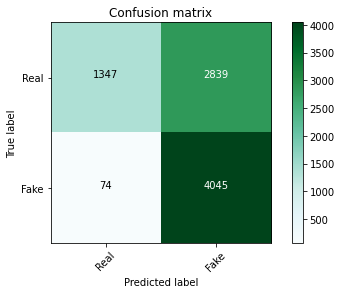

In [42]:
#k=3
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [43]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.6988561107766406
              precision    recall  f1-score   support

           0       0.89      0.46      0.61      4186
           1       0.63      0.94      0.76      4119

    accuracy                           0.70      8305
   macro avg       0.76      0.70      0.68      8305
weighted avg       0.76      0.70      0.68      8305



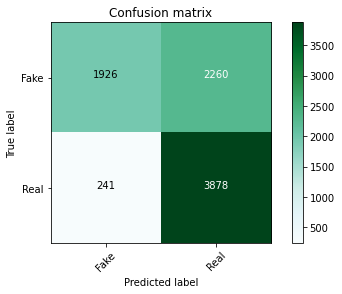

In [44]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(xv_train,y_train)
filename = 'passiveAggressive.sav'
pickle.dump(pac, open(filename, 'wb'))


In [46]:
y_pac=pac.predict(xv_test)

In [47]:
accuracy_score(y_test,y_pac)

0.9638771824202288